In [60]:
import pandas as pd # Manipulación de Datos
import numpy as np # Algebra Lineal
import matplotlib.pyplot as plt # Gráficos
import seaborn as sns # Estilos de Gráficos
from sklearn.linear_model import LogisticRegressionCV # Modelado
from sklearn.model_selection import train_test_split # Dividir datos.
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import xgboost as xgb # Arboles avanzados.
from matplotlib import rcParams #Parametros de Gráficos.
import warnings
pd.options.mode.chained_assignment = None
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

#Cualidades de los gráficos
%matplotlib inline
sns.set_style('ticks')
rcParams['figure.figsize'] = (6, 6)
rcParams['figure.dpi'] = 100
rcParams['font.size'] = 12
rcParams["patch.force_edgecolor"] = True

Los bancos juegan un rol crucial en las economias de mercado. Ellos deciden quienes pueden obtener financiamientos y en que terminos y pueden hacer o deshacer decisiones de inversión. Para el funcionamiento adecuado de los mercados y la sociedad, individuos y compañias necesitan acceso al crédito.

Los algoritmos de puntuación de crédito, los cuales hacen un estimado de la probabilidad de incumplimiento del cliente, son un metodo que utilizan los bancos para determinar si un préstamo deba ser otorgado o no. En este articulo,  se analizan datos de 150 mil clientes que tomaron prestamos y se crea un modelo que puede predecir con cierta certeza, la probabilidad de que un cliente no cumpla con las condiciones de su crédito. Estos datos provienen del sitio Kaggle, que los usó para crear una competencia  en la cual se intentaba obtener el modelo que tuviera la mejor certeza posible sobre los datos.





## 1. Introducción a los datos

Primero, le echamos una vista a los datos, para obtener información a simple vista del problema.

In [2]:
datos_credito = pd.read_csv("cs-training.csv",index_col = [0])
print("El set de datos tiene {} filas y {} columnas".format(datos_credito.shape[0],datos_credito.shape[1]))
datos_credito.head(10)

El set de datos tiene 150000 filas y 11 columnas


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


Como los datos están en inglés, renombramos las columnas a su nombre equivalente en español. 

In [3]:
nuevas_columnas = ["Incumplimiento2Años","UtilizacionRevolventeLineasInseguras","Edad","VecesVencimiento30_59Dias","ProporcionDeuda",
                  "IngresosMensualesDolares","NumeroLineasCreditoAbiertas","NumeroVecesTarde90Dias","NumeroLineasBienesRaices",
                   "VecesVencimiento60_89Dias","NumeroDependientes"]
datos_credito.columns = nuevas_columnas
datos_credito.head(10)

,Incumplimiento2Años,UtilizacionRevolventeLineasInseguras,Edad,VecesVencimiento30_59Dias,ProporcionDeuda,IngresosMensualesDolares,NumeroLineasCreditoAbiertas,NumeroVecesTarde90Dias,NumeroLineasBienesRaices,VecesVencimiento60_89Dias,NumeroDependientes
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


Ahora, vamos a ver información sobre los tipos de datos de las columnas.

In [4]:
datos_credito.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
Incumplimiento2Años                     150000 non-null int64
UtilizacionRevolventeLineasInseguras    150000 non-null float64
Edad                                    150000 non-null int64
VecesVencimiento30_59Dias               150000 non-null int64
ProporcionDeuda                         150000 non-null float64
IngresosMensualesDolares                120269 non-null float64
NumeroLineasCreditoAbiertas             150000 non-null int64
NumeroVecesTarde90Dias                  150000 non-null int64
NumeroLineasBienesRaices                150000 non-null int64
VecesVencimiento60_89Dias               150000 non-null int64
NumeroDependientes                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 13.7 MB


Todos los datos son númericos, y son pertenientes al problema de determinar el incumplimiento en el pago del crédito, por al menos 90 días de vencimiento, en dos años. En particular, se quiere determinar si un cliente será delincuente, al menos una vez, en dos años. También, se puede observar que existen datos nulos, especialmente en los ingresos mensuales. Vamos a ver ahora la distribución de valores de estos datos.

In [5]:
datos_credito.describe()

,Incumplimiento2Años,UtilizacionRevolventeLineasInseguras,Edad,VecesVencimiento30_59Dias,ProporcionDeuda,IngresosMensualesDolares,NumeroLineasCreditoAbiertas,NumeroVecesTarde90Dias,NumeroLineasBienesRaices,VecesVencimiento60_89Dias,NumeroDependientes
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


Según estas estadísticas, se pueden aprecar varias informaciones clave sobre los datos:

- La mayoria de los registros contienen clientes que cumplieron con su crédito, ya que más del 75% de los registros contienen cumplimiento de crédito.
- La proporción de deuda y la utlización revolvente de lineas inseguras tienen valores muy fuera de lo común para ser datos que en su mayoría se encuentra entre 0 y 1.
- Los datos relacionados al vencimiento tienen un numero extremo en común, que quizas sea muy raro para incluirlo en el análisis final. 

Debido a esto habrá que hacer limpieza en los datos para solo tener datos que no sean erroneos, y por ahí mismo no falten datos claves que afecten otros datos, como en el caso de clientes que sin datos de ingresos mensuales. Para verlo más a fondo, vamos a ver las distribuciones de estos datos.

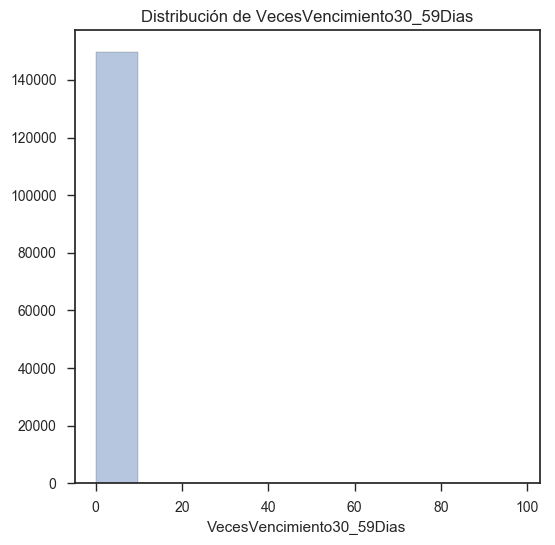

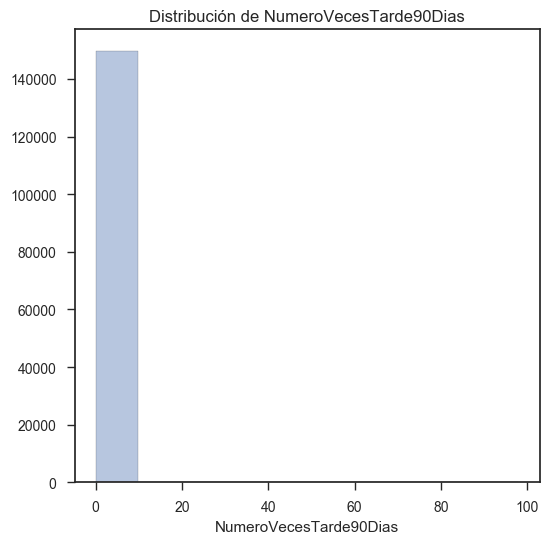

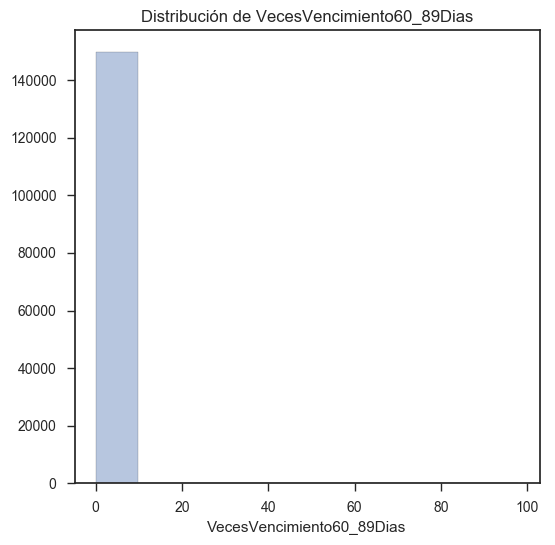

In [6]:
def Crear_Histograma(x,titulo):
    sns.distplot(x,kde = False,bins = 10)
    plt.title(titulo)
    plt.show()

columnas_histograma = [columna for columna in datos_credito.columns if "Veces" in columna]
for column in columnas_histograma:
    Crear_Histograma(datos_credito[column].dropna(),"Distribución de {}".format(column))

Debido a que estas distribuciones están extremadamente centradas a la izquierda, se puede confirmar que hay valores extremos que afectan de manera grave a  las estadisticas descriptivas. Ya que tenemos una idea del problema, podemos proceder a limpiar los datos. 

## 2. Limpieza de Datos

Según vimos en la sección anterior, hay datos extremos y erroneos en el set de datos. El modelo final sería afectado por estos datos, asi que tenemos que lidiar con ellos. Vamos a limpiar primero los ingresos y el nivel de deuda. Para esto, primero buscamos la proporción de datos faltantes en la columna. Esto nos dará una idea de como lidiar con ellos.

#### 2.1 Datos Faltantes

In [7]:
total_na = datos_credito.IngresosMensualesDolares.isnull().sum()
print("Datos faltantes en la columna: {}".format(total_na))
prop_na = 1 - (datos_credito.shape[0] - total_na) / datos_credito.shape[0]
print("Proporción de datos faltantes: {} %".format(round(prop_na * 100,2)))

Datos faltantes en la columna: 29731
Proporción de datos faltantes: 19.82 %


Hay una cifra significante de datos faltantes en la columna de ingresos. Vamos a dar un vistazo sobre estos datos.

In [8]:
ingresos_faltantes = datos_credito.loc[pd.isnull(datos_credito.IngresosMensualesDolares)]
ingresos_faltantes.head(10)

,Incumplimiento2Años,UtilizacionRevolventeLineasInseguras,Edad,VecesVencimiento30_59Dias,ProporcionDeuda,IngresosMensualesDolares,NumeroLineasCreditoAbiertas,NumeroVecesTarde90Dias,NumeroLineasBienesRaices,VecesVencimiento60_89Dias,NumeroDependientes
7,0,0.305682,57,0,5710.0,NaN,8,0,3,0,0.0
9,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
17,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
33,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0
42,0,0.072898,81,0,75.0,NaN,7,0,0,0,0.0
53,0,1.000000,62,0,0.0,NaN,1,0,0,0,0.0
59,0,0.541109,43,0,2477.0,NaN,3,0,1,0,2.0
63,0,0.101156,72,0,1720.0,NaN,12,0,2,0,0.0
72,0,0.142013,67,0,1824.0,NaN,7,0,2,0,0.0
87,0,0.360510,58,1,3282.0,NaN,8,0,2,0,0.0


Algo interesante a tomar en cuenta, es que las proporciones de deuda en estas cuentas superan 1 por un gran margen. Esto nos deja dicho que la proporcion de deuda es calculada tomando en cuenta los ingresos mensuales. Ya que estas dos columnas son dependientes, y es dificil asumir los ingresos de una persona solamente con esta información, podemos eliminar estas ocurrencias del set de datos. 

In [9]:
filas_corrientes = datos_credito.shape[0]
ingresos_limpios = datos_credito.loc[pd.notnull(datos_credito.IngresosMensualesDolares)]
print("Fueron afectadas {} filas".format(filas_corrientes - ingresos_limpios.shape[0]))
print("El set de datos ahora tiene {} filas".format(ingresos_limpios.shape[0]))

Fueron afectadas 29731 filas
El set de datos ahora tiene 120269 filas


#### 2.2 Lineas Inseguras

Otra columna que contenia valores entre 0 y 1, pero tenia valores que superan esa cantidad eran los revolventes en lineas inseguras. Vamos primero a visualizar los que tienen un valor mayor que 1.

In [10]:
revinsegura_extrema = ingresos_limpios.loc[ingresos_limpios.UtilizacionRevolventeLineasInseguras > 1]
revinsegura_extrema.head(10)

,Incumplimiento2Años,UtilizacionRevolventeLineasInseguras,Edad,VecesVencimiento30_59Dias,ProporcionDeuda,IngresosMensualesDolares,NumeroLineasCreditoAbiertas,NumeroVecesTarde90Dias,NumeroLineasBienesRaices,VecesVencimiento60_89Dias,NumeroDependientes
163,1,1.046279,47,1,1.104301,5416.0,6,0,2,0,1.0
192,0,1.095083,53,5,0.536704,3500.0,7,1,1,2,0.0
227,1,1.953488,38,0,0.153500,3556.0,5,0,0,0,2.0
252,1,1.048211,58,7,0.151957,3500.0,12,0,0,0,0.0
294,0,2340.000000,45,0,0.339333,8333.0,7,0,2,0,2.0
320,0,1.002647,38,2,0.472543,3550.0,8,1,0,1,4.0
370,0,1.047496,35,2,0.314566,3871.0,8,0,2,1,3.0
650,0,1.011333,52,0,10.800499,400.0,8,0,1,0,2.0
668,1,1.248751,33,0,0.175120,2700.0,3,2,0,0,0.0
698,1,2066.000000,58,0,0.271121,6000.0,8,1,1,0,1.0


Vamos a ver cuantos datos existen con esta  peculiaridad.

In [11]:
print("El set de datos tiene {} filas".format(revinsegura_extrema.shape[0]))

El set de datos tiene 2773 filas


¿Qué tal las estadísticas descriptivas para estos datos?

In [12]:
revinsegura_extrema.describe()

,Incumplimiento2Años,UtilizacionRevolventeLineasInseguras,Edad,VecesVencimiento30_59Dias,ProporcionDeuda,IngresosMensualesDolares,NumeroLineasCreditoAbiertas,NumeroVecesTarde90Dias,NumeroLineasBienesRaices,VecesVencimiento60_89Dias,NumeroDependientes
count,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000,2773.000000
mean,0.371439,242.572802,43.667508,1.034980,14.847015,5289.567977,6.554995,0.645150,0.714389,0.423368,1.027407
std,0.483277,1676.065519,12.217655,1.360599,204.258876,5134.134472,4.069954,1.354383,1.004642,0.843224,1.220011
min,0.000000,1.000059,21.000000,0.000000,0.000800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.018230,34.000000,0.000000,0.152493,2700.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.066387,42.000000,1.000000,0.304987,4184.000000,6.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.261337,52.000000,2.000000,0.524882,6458.000000,9.000000,1.000000,1.000000,1.000000,2.000000
max,1.000000,50708.000000,87.000000,10.000000,6243.000000,141500.000000,40.000000,15.000000,10.000000,7.000000,8.000000


Aqui surge un dato interesante. A diferencia del set de datos completo, en esta subsección hay un numero significante de personas que han fallado en cumplir el pago del crédito. Por ahí mismo, la utilización revolvente de lineas inseguras no llega a 2 para más del 75% de los casos. Vamos a ver la proporción de usuarios que no pudieron cumplir con su obligación de credito.

In [13]:
revinsegura_extrema.Incumplimiento2Años.value_counts()

0    1743
1    1030
Name: Incumplimiento2Años, dtype: int64

Debido a que existe un número significante de personas que fallaron en cumplir con su crédito, no podemos descartar estos datos así por así. Vamos a visualizar aquellos que tienen un valor de 2 o más en la utilización revolvente.

In [14]:
dos_o_mas = revinsegura_extrema.loc[revinsegura_extrema.UtilizacionRevolventeLineasInseguras >=2]
dos_o_mas.describe()

,Incumplimiento2Años,UtilizacionRevolventeLineasInseguras,Edad,VecesVencimiento30_59Dias,ProporcionDeuda,IngresosMensualesDolares,NumeroLineasCreditoAbiertas,NumeroVecesTarde90Dias,NumeroLineasBienesRaices,VecesVencimiento60_89Dias,NumeroDependientes
count,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000,278.000000
mean,0.165468,2409.433087,46.848921,0.460432,20.622536,7883.525180,6.395683,0.374101,1.089928,0.190647,0.899281
std,0.372272,4782.776851,12.869752,1.059706,213.387670,6419.810959,3.808823,1.350349,1.134862,0.666083,1.109818
min,0.000000,2.013733,23.000000,0.000000,0.000800,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.147308,36.250000,0.000000,0.151490,4000.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,727.500000,45.000000,0.000000,0.283435,6358.000000,6.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,2994.500000,56.000000,0.000000,0.470023,10000.000000,8.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,83.000000,7.000000,2597.000000,44472.000000,21.000000,15.000000,9.000000,7.000000,4.000000


Ya aquí hay menos diferencia en los que cumplieron o no. Para el set de datos final, no incluiremos aquellos cuya utilización revolvente de lineas inseguras supere 5.

In [15]:
revolvente_limpias = ingresos_limpios.loc[ingresos_limpios.UtilizacionRevolventeLineasInseguras <= 5]
print("Fueron afectadas {} filas".format(ingresos_limpios.shape[0] - revolvente_limpias.shape[0]))
print("El set de datos ahora tiene {} filas".format(revolvente_limpias.shape[0]))

Fueron afectadas 182 filas
El set de datos ahora tiene 120087 filas


#### 2.3 Proporción de Deuda

Aún despues de eliminar los ingresos a los cuales les faltaban datos, existen proporciones de deudas mucho mayores que 1. Vamos a visualizar los datos que cumplen con este criterio.

In [16]:
deuda_mayor = revolvente_limpias.loc[revolvente_limpias.ProporcionDeuda > 1]
deuda_mayor.head(10)

,Incumplimiento2Años,UtilizacionRevolventeLineasInseguras,Edad,VecesVencimiento30_59Dias,ProporcionDeuda,IngresosMensualesDolares,NumeroLineasCreditoAbiertas,NumeroVecesTarde90Dias,NumeroLineasBienesRaices,VecesVencimiento60_89Dias,NumeroDependientes
15,0,0.019657,76,0,477.000000,0.0,6,0,1,0,0.0
26,1,0.392248,50,0,1.595253,4676.0,14,0,3,0,1.0
45,0,0.368876,68,0,1687.500000,1.0,31,0,1,0,0.0
51,0,0.818978,73,0,3095.000000,0.0,9,0,1,1,0.0
64,0,0.009789,46,0,1.051398,3326.0,6,0,2,0,2.0
74,0,0.059669,31,0,3162.000000,0.0,11,0,2,0,1.0
80,0,0.270523,41,0,2.797699,1042.0,11,0,2,0,2.0
83,0,0.017259,53,0,2.604511,12414.0,13,0,1,0,2.0
91,0,0.039388,51,0,15466.000000,0.0,7,0,0,0,0.0
112,0,0.318446,58,0,1.382629,3833.0,26,0,4,0,0.0


Lo que causa estos valores extremos en la proporción de deuda, es los ingresos mensuales inexistentes de algunos clientes. Esta es una situación que puede suceder, así que no podemos descartar   estos datos. Sin embargo, podemos crear una nueva columna para ayudarnos a tener más información sobre la proporción de la deuda: ** Monto de Deuda**. Si sabemos que la proporción de deuda se calcula de la siguiente manera:

$$ Proporcion \ Deuda = \dfrac{Deuda \ Total}{Ingreso \ Total} $$


Podemos despejar la deuda total del cálculo y obtener:

$$ Deuda \ Total = Proporcion \ Deuda \cdot Ingreso \ Total $$

Vamos a añadir este valor a los datos.

In [17]:
revolvente_limpias.loc[revolvente_limpias.IngresosMensualesDolares == 0.0, "IngresosMensualesDolares"] = 1.0
deuda_total = revolvente_limpias.IngresosMensualesDolares * revolvente_limpias.ProporcionDeuda
revolvente_limpias.loc[:,"DeudaMensual"] = deuda_total
revolvente_limpias.describe()

,Incumplimiento2Años,UtilizacionRevolventeLineasInseguras,Edad,VecesVencimiento30_59Dias,ProporcionDeuda,IngresosMensualesDolares,NumeroLineasCreditoAbiertas,NumeroVecesTarde90Dias,NumeroLineasBienesRaices,VecesVencimiento60_89Dias,NumeroDependientes,DeudaMensual
count,120087.000000,120087.000000,120087.000000,120087.000000,120087.000000,1.200870e+05,120087.000000,120087.000000,120087.000000,120087.000000,120087.000000,120087.000000
mean,0.069441,0.333155,51.295061,0.381981,26.613519,6.667510e+03,8.762564,0.212105,1.054219,0.187939,0.851816,2138.681767
std,0.254204,0.359842,14.427439,3.501784,424.709632,1.439304e+04,5.174096,3.467807,1.149291,3.450422,1.148465,4205.141666
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.034949,41.000000,0.000000,0.143360,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000,622.837080
50%,0.000000,0.176570,51.000000,0.000000,0.296056,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000,1639.739726
75%,0.000000,0.576523,61.000000,0.000000,0.482607,8.240000e+03,11.000000,0.000000,2.000000,0.000000,2.000000,2891.580455
max,1.000000,4.937063,103.000000,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000,478450.559160


Ya que los ingresos mensuales pequeños describen los valores grandes de la proporción de deuda, podemos dejar este valor así por ahora.

#### 2.4 Veces Vencimiento

En los datos sobre las veces que un cliente supero su vencimiento de pago, tambien se ven datos extremos.

In [18]:
Vencimiento_Grande=  revolvente_limpias.loc[revolvente_limpias.VecesVencimiento30_59Dias > 5]
Vencimiento_Grande.head(10)

,Incumplimiento2Años,UtilizacionRevolventeLineasInseguras,Edad,VecesVencimiento30_59Dias,ProporcionDeuda,IngresosMensualesDolares,NumeroLineasCreditoAbiertas,NumeroVecesTarde90Dias,NumeroLineasBienesRaices,VecesVencimiento60_89Dias,NumeroDependientes,DeudaMensual
252,1,1.048211,58,7,0.151957,3500.0,12,0,0,0,0.0,531.848044
424,1,0.991502,61,10,1.297901,3000.0,11,2,3,5,1.0,3893.702100
1053,1,0.232227,59,6,6.094453,2000.0,16,2,1,2,1.0,12188.905548
1683,0,1.025987,63,6,0.521442,3800.0,8,2,2,1,1.0,1981.478559
1734,1,1.000000,27,98,0.000000,2700.0,0,98,0,98,0.0,0.000000
2070,1,0.769765,37,6,1.433628,3050.0,8,2,1,1,1.0,4372.566373
2381,0,1.042754,59,6,0.228472,14666.0,7,4,2,0,0.0,3350.771525
3174,0,0.597505,51,6,0.057945,6091.0,12,0,0,2,0.0,352.942057
3623,1,0.573024,56,7,0.394758,4921.0,14,0,1,0,0.0,1942.605240
3653,1,0.991424,40,6,0.892328,5200.0,9,0,2,1,0.0,4640.107670


Sin embargo, se puede apreciar que los que han superado la fecha de vencimiento de pago en multiples ocasiones, se han convertido en delincuentes.

In [19]:
Vencimiento_Grande.Incumplimiento2Años.value_counts()

1    188
0    172
Name: Incumplimiento2Años, dtype: int64

Para estos casos, el numero de incumplimientos supera al numero de clientes buenos. Por esta razón, es mejor dejar estos datos quietos. Ya con la limpieza de los datos terminada, podemos pasar a crear nuevas variables como hicimos con el total de deuda.

In [20]:
datos_limpios = revolvente_limpias

## 3. Ingeniería de Características

Aquí es donde podemos ser creativos con los datos. Podemos crear nuevas caracteristicas sobre los datos con las  caracteristicas que ya tenemos. Una en particular, puede ser para los clientes que nunca estuvieron tardes en pagar una cuota del crédito y el total de veces que estuvieron tardes.

In [21]:
nunca_tarde = np.where((datos_limpios.VecesVencimiento30_59Dias == 0) & (datos_limpios.VecesVencimiento60_89Dias == 0)
                      & (datos_limpios.NumeroVecesTarde90Dias == 0),1,0)
datos_limpios['NuncaTarde'] = nunca_tarde
datos_limpios['TotalTarde'] = datos_limpios.VecesVencimiento30_59Dias + datos_limpios.VecesVencimiento60_89Dias + datos_limpios.NumeroVecesTarde90Dias
datos_limpios.NuncaTarde.describe()

count    120087.000000
mean          0.788437
std           0.408418
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: NuncaTarde, dtype: float64

Al parecer, la mayoria de los clientes nunca estuvieron tarde en pagar cuotas del crédito. También, podemos agregar caracteristicas sobre nuestros descubrimientos anteriores de clientes sin ingresos mensuales, sin deudas o sin dependientes.

In [22]:
datos_limpios['SinIngresos'] = np.where(datos_limpios.IngresosMensualesDolares == 1.0,1,0)
datos_limpios['SinDeuda'] = np.where(datos_limpios.DeudaMensual == 0.0,1,0)
datos_limpios['SinDependientes'] = np.where(datos_limpios.NumeroDependientes == 0.0,1,0)
datos_limpios.head()

,Incumplimiento2Años,UtilizacionRevolventeLineasInseguras,Edad,VecesVencimiento30_59Dias,ProporcionDeuda,IngresosMensualesDolares,NumeroLineasCreditoAbiertas,NumeroVecesTarde90Dias,NumeroLineasBienesRaices,VecesVencimiento60_89Dias,NumeroDependientes,DeudaMensual,NuncaTarde,TotalTarde,SinIngresos,SinDeuda,SinDependientes
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,7323.197016,0,2,0,0,0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,316.878123,1,0,0,0,0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,258.914887,0,2,0,0,1
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,118.963951,1,0,0,0,1
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,1584.975094,0,1,0,0,1


Tambien, otro calculo es el numero de lineas resolventes. Esto se obtiene de la siguiente manera:

$ Lineas \ Resolventes = Lineas \ Credito - Lineas \ Bienes $

In [23]:
datos_limpios['LineasRevolventes'] = datos_limpios.NumeroLineasCreditoAbiertas - datos_limpios.NumeroLineasBienesRaices
datos_limpios['TieneRevolventes'] = np.where(datos_limpios.LineasRevolventes == 0,0,1)
datos_limpios.LineasRevolventes.describe()

count    120087.000000
mean          7.708345
std           4.797556
min           0.000000
25%           4.000000
50%           7.000000
75%          10.000000
max          57.000000
Name: LineasRevolventes, dtype: float64

Podemos crear variables dividiendo los que tienen prestamos de bienes raices.

In [24]:
datos_limpios['TieneLineasBienes'] = np.where(datos_limpios.NumeroLineasBienesRaices == 0,0,1)
datos_limpios['TieneMultiplesLineasBienes'] = np.where(datos_limpios.NumeroLineasBienesRaices >= 2,1,0)
datos_limpios.TieneMultiplesLineasBienes.describe()

count    120087.000000
mean          0.291855
std           0.454618
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: TieneMultiplesLineasBienes, dtype: float64

Y caracteristicas sobre los ingresos disponibles del cliente.

In [25]:
datos_limpios['IngresosDisponibles'] = (1 - datos_limpios.ProporcionDeuda) * datos_limpios.IngresosMensualesDolares
datos_limpios.loc[datos_limpios.IngresosMensualesDolares == 1,"IngresosDisponibles"] = 0
datos_limpios.IngresosDisponibles.describe()

count    1.200870e+05
mean     4.555014e+03
std      1.459180e+04
min     -4.674163e+05
25%      1.940667e+03
50%      3.565340e+03
75%      5.863363e+03
max      3.004327e+06
Name: IngresosDisponibles, dtype: float64

Y, por último, caracteristicas sobre las delincuencias por cada línea de credito.

In [26]:
datos_limpios['DelincuenciasPorLinea'] = datos_limpios.TotalTarde / datos_limpios.NumeroLineasCreditoAbiertas
datos_limpios.loc[datos_limpios.NumeroLineasCreditoAbiertas == 0,"DelincuenciasPorLinea"] = 0
datos_limpios['DelincuenciasRevolventes'] = datos_limpios.TotalTarde / datos_limpios.LineasRevolventes
datos_limpios.loc[datos_limpios.LineasRevolventes == 0,"DelincuenciasRevolventes"] = 0
datos_limpios.DelincuenciasPorLinea.describe()

count    120087.000000
mean          0.080851
std           1.232386
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         294.000000
Name: DelincuenciasPorLinea, dtype: float64

Aunque es posible crear más características, para no llevar la complejidad a un nivel extremo, nos quedamos satisfechos con este total de variables. Vamos a revisar el tamaño del set de datos nuevamente, antes de visualizar con más detalle los datos.

In [27]:
print("El set de datos tiene {} filas y {} columnas".format(datos_limpios.shape[0],datos_limpios.shape[1]))

El set de datos tiene 120087 filas y 24 columnas


## 4. Visualización de Datos

Ya con todas nuestras variables hechas, vamos a visualizar con más claridad los patrones un poco más ocultos de los datos. Primero vamos a visualizar como se relacionan las caracteristicas de los datos.

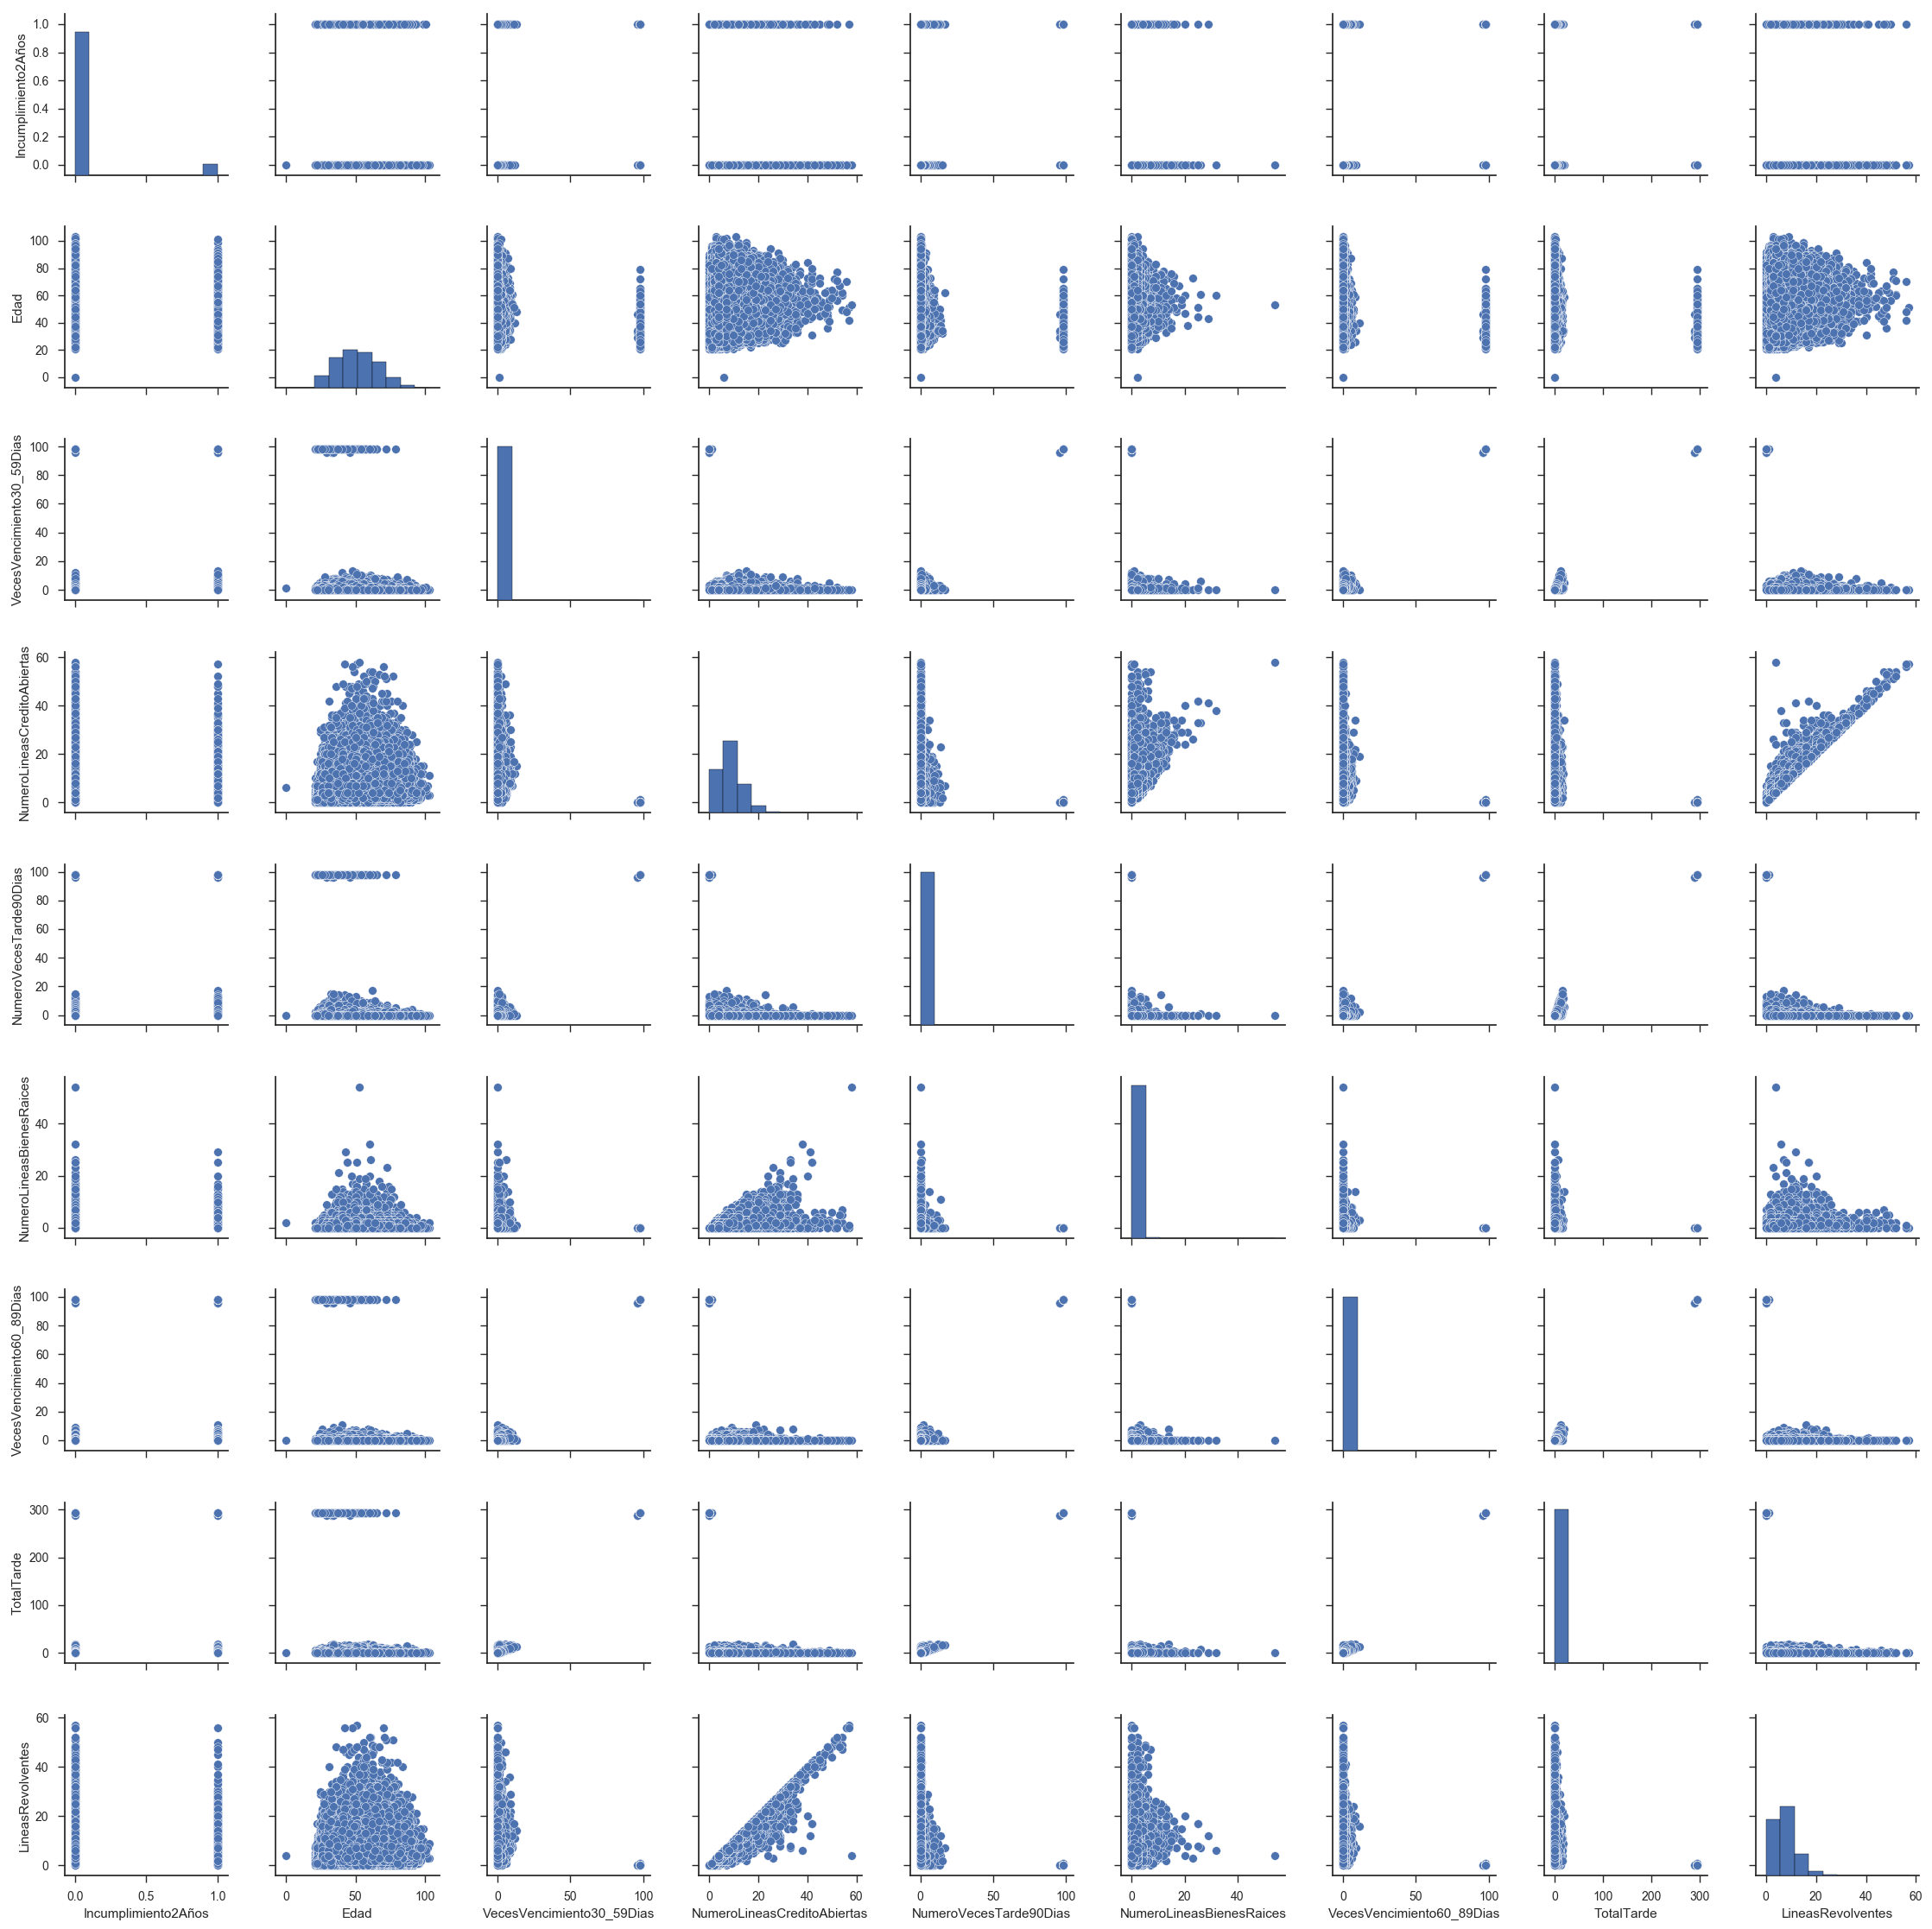

In [28]:
#Solo con los enteros.
int_df = datos_limpios[[columna for columna in datos_limpios.columns if datos_limpios[columna].dtype == np.int64]]
sns.pairplot(int_df)

Si nos enfocamos solamente en nuestra variable de interés, no podemos ver una característica que cause una diferencia entre significante entre los que son delincuentes y los que no. Por otro lado, en la mayoria de las caracteristicas, los valroes se encuentran cerca de cero, o simplemente bajos.

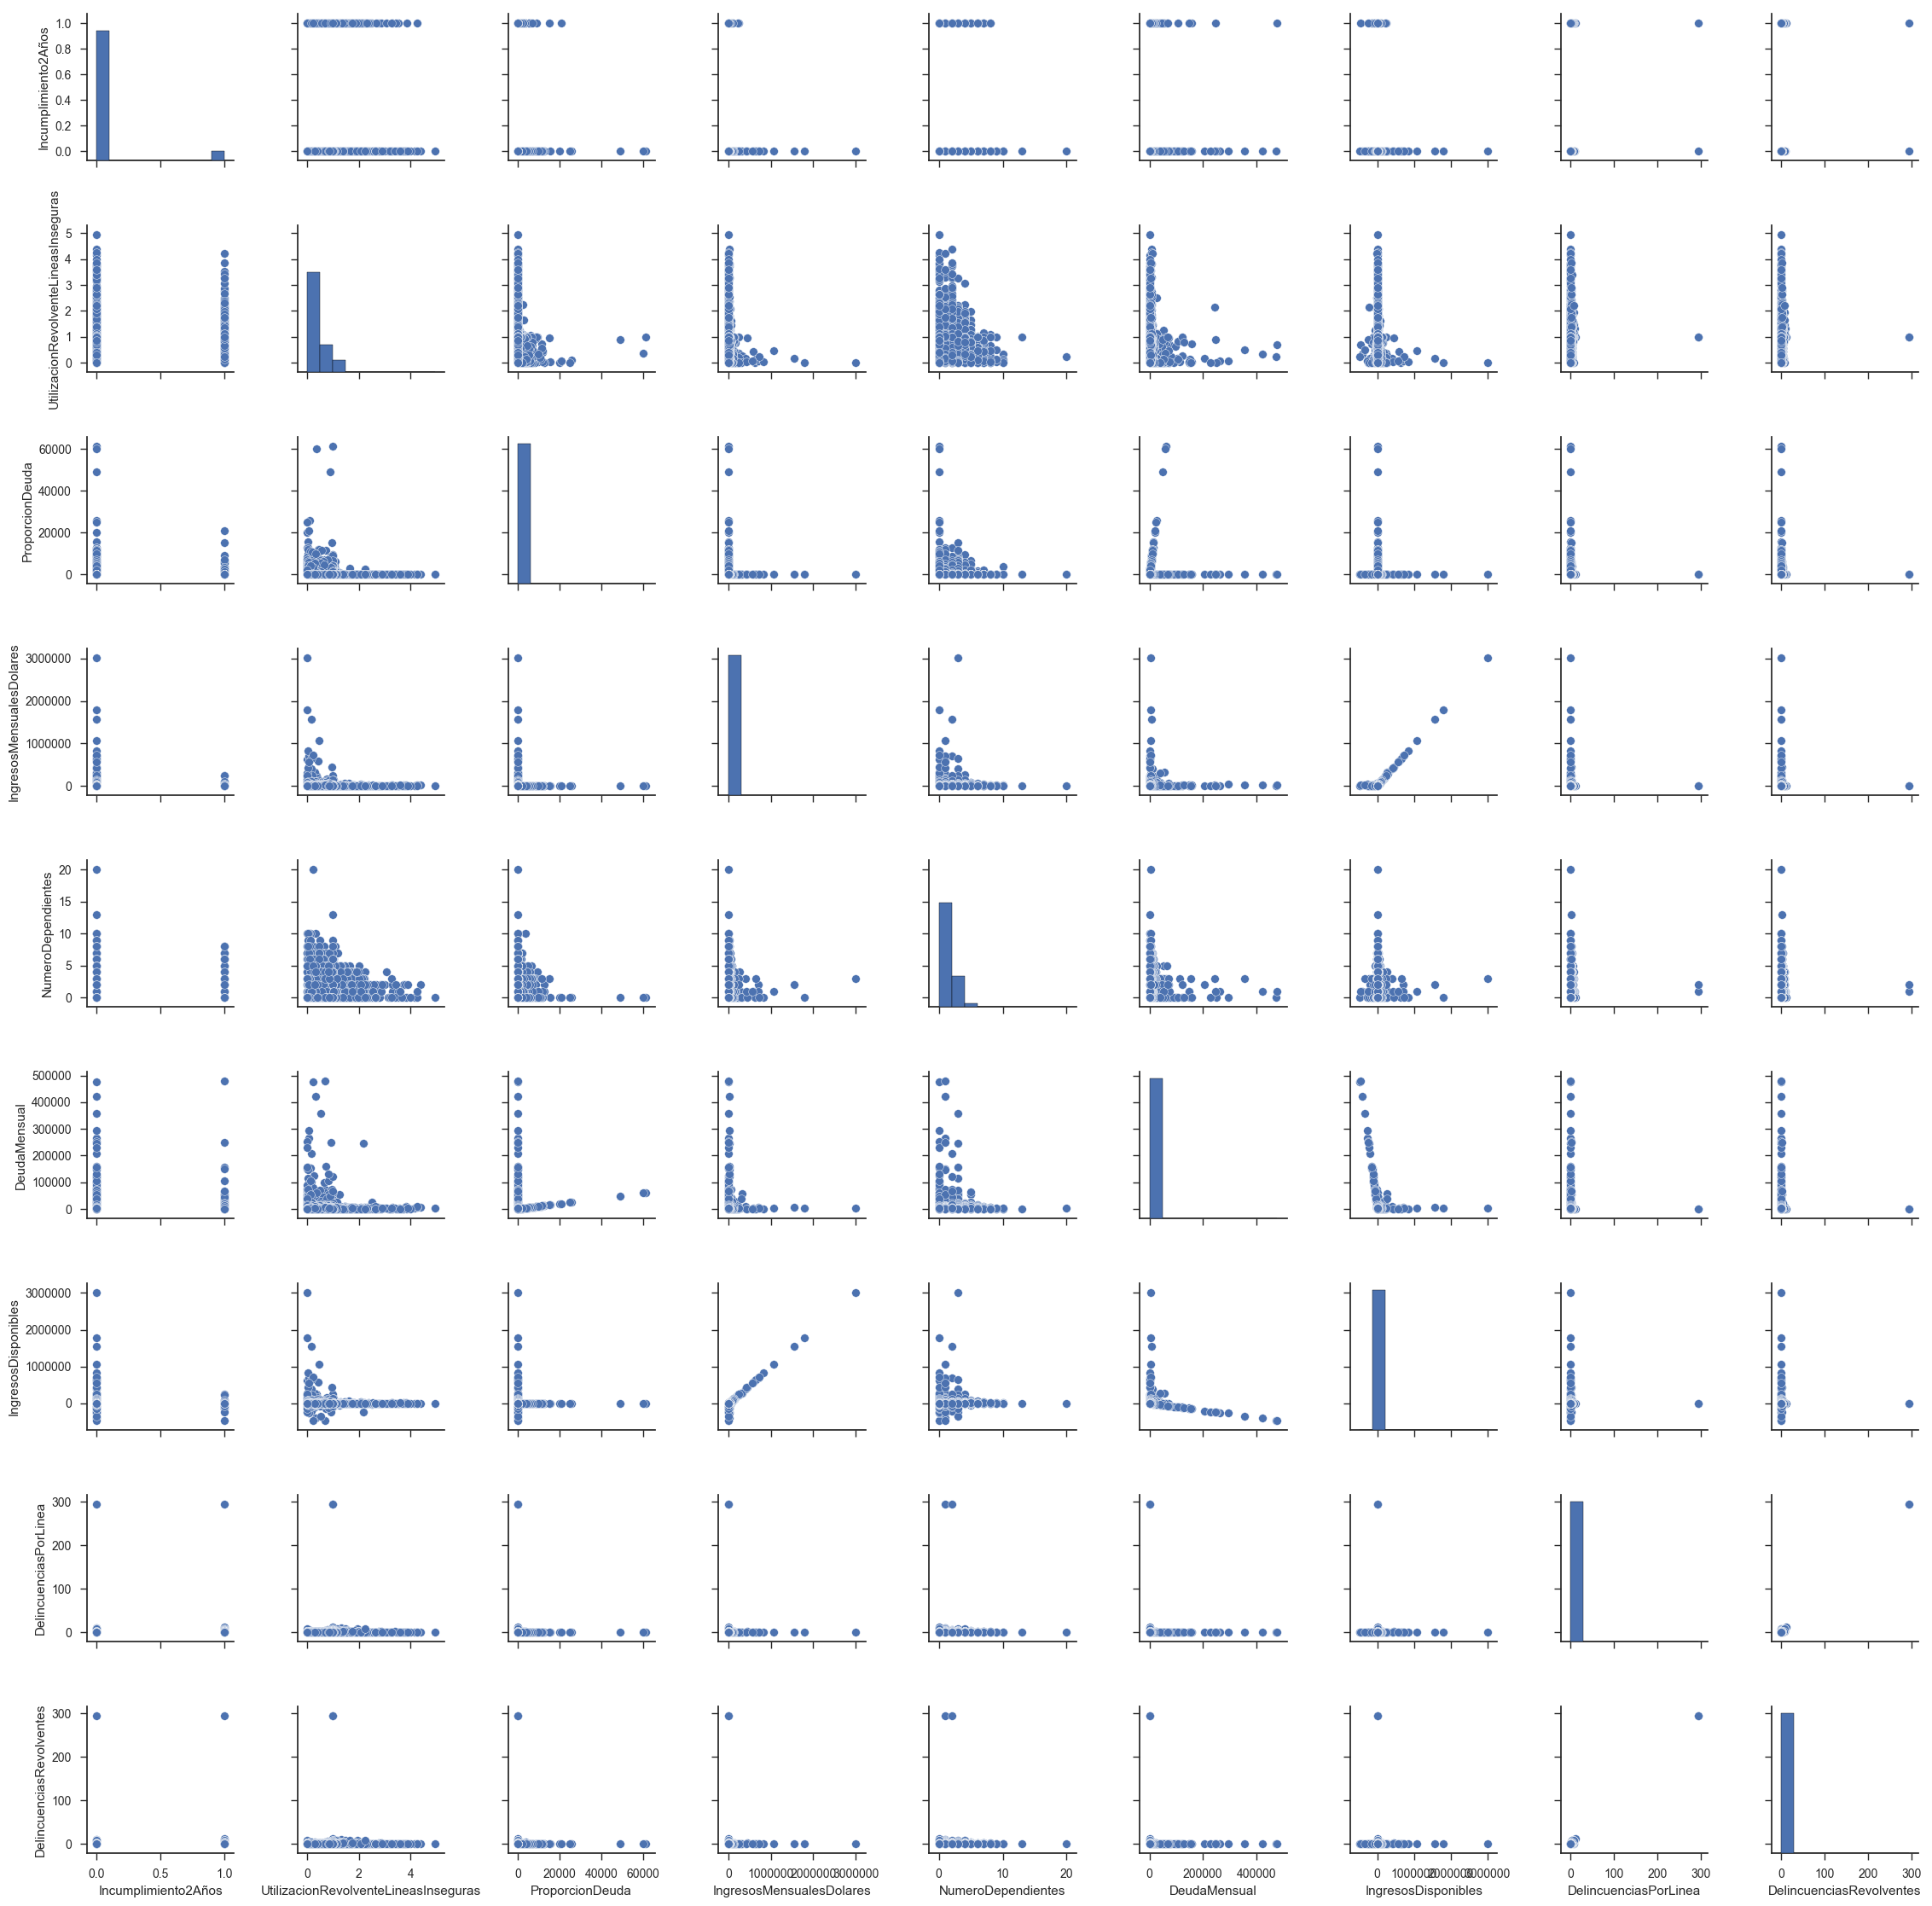

In [29]:
#Variables numericas
num_df = datos_limpios[[columna for columna in datos_limpios.columns if datos_limpios[columna].dtype == np.float64
                        or "Incumplimiento" in columna]]
sns.pairplot(num_df)

Ya aquí  se ve un poco más de diferencia para los delincuentes. Para las dos caracteristicas de ingresos,no existen personas delincuentes para los ingresos mensuales y disponibles muy altos. Esto se debe a que tienen los ingresos suficientes para pagar su crédito. Ya en las otras características, se ve un comportamiento similar al de las variables discretas. La mayoria tiende a valores pequeños. Ahora vamos a ver la relación entre algunas características y la variable de interés.

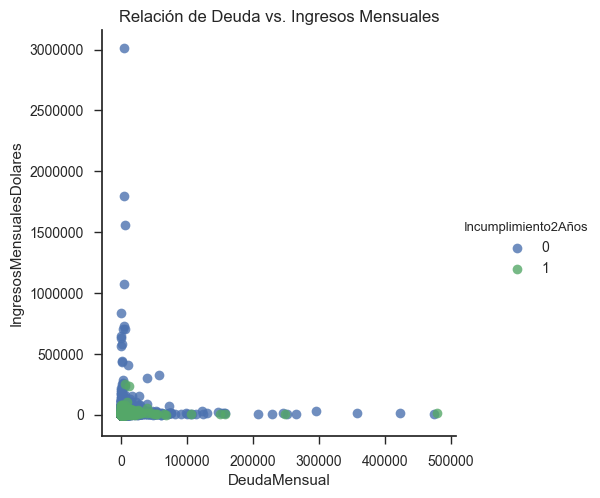

In [30]:
def Grafico_Scatter(x,y,titulo):
    sns.lmplot(x = x, y = y,hue = "Incumplimiento2Años",data = datos_limpios,fit_reg = False)
    plt.title(titulo)

Grafico_Scatter("DeudaMensual","IngresosMensualesDolares","Relación de Deuda vs. Ingresos Mensuales")

Aquí podemos confirmar que aquellos con  altos ingresos mensuales no son delincuentes. Pero, tambien vemos que aún los que no tienen ingresos pueden saldar sus acuerdos. Pero, la mayoria de los casos de estos datos, son de clientes con pocas deudas, y pocos ingresos. 

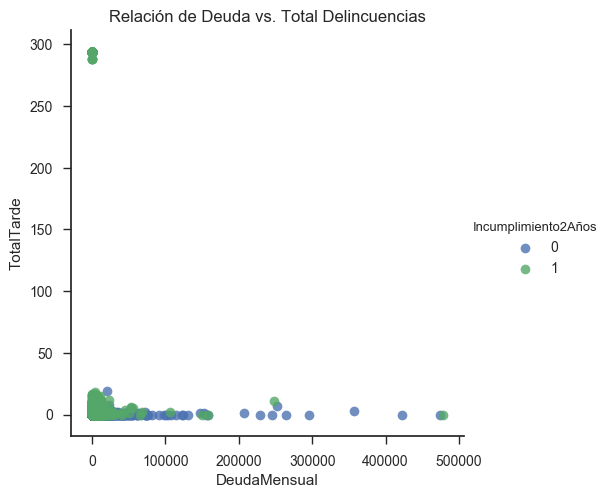

In [31]:
Grafico_Scatter("DeudaMensual","TotalTarde","Relación de Deuda vs. Total Delincuencias")

Para clientes con un numero alto de delincuencias, se puede ver que están más propensos a hacerlo de nuevo. Aún así, le podemos dar el beneficio de la duda, porque hay casos sin delincuencias que ha cumplido con el crédito. 

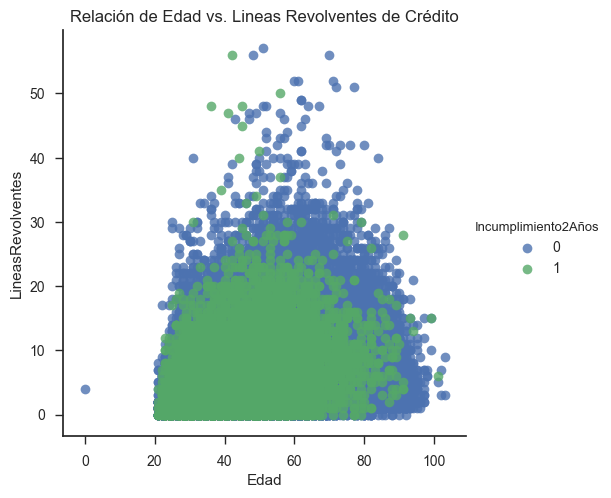

In [32]:
Grafico_Scatter("Edad","LineasRevolventes","Relación de Edad vs. Lineas Revolventes de Crédito")

En esta relación, se ve un patron interesante para valores grandes de las  dos caracteristicas. Se puede apreciar que no hay casi incumplimiento para valores grandes de edad y/o Lineas revolventes. Aún si, no hay un patrón visible para poder distinguir las dos clases, aunque si hay alguien que no tiene edad y ya tiene lineas revolventes.

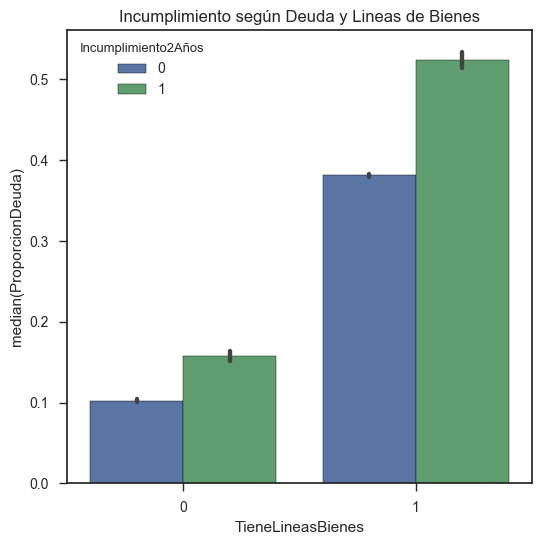

In [33]:
def Grafico_Barra(x,y,titulo):
    sns.barplot(x = x,y = y, hue = "Incumplimiento2Años",data = datos_limpios,estimator = np.median)
    plt.title(titulo)
    
Grafico_Barra('TieneLineasBienes','ProporcionDeuda','Incumplimiento según Deuda y Lineas de Bienes')

Aquí ya se ve una diferencia más significante, para aquellos que tienen lineas de crédito de bienes raices, y tienen una proporcion de deuda mayor al 40%. En general, se ve más delincuentes para aquellos con una proporción de deuda mayor, en comparación con los que no son delincuentes.

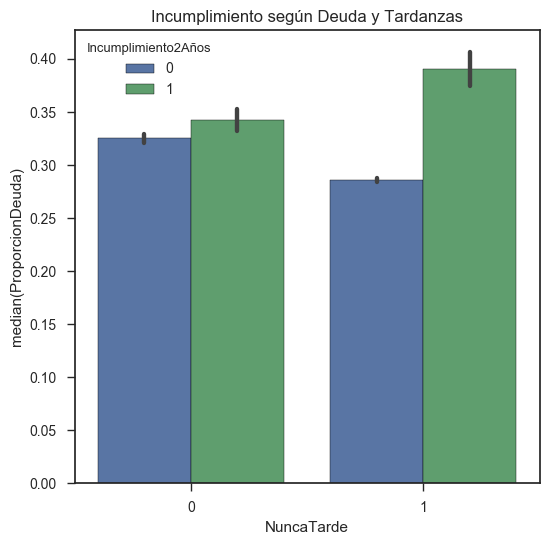

In [34]:
Grafico_Barra('NuncaTarde','ProporcionDeuda','Incumplimiento según Deuda y Tardanzas')

Aquí, para los que nunca estan tardes, se ve la misma relación en la cual los que tienen una mayor proporción de deuda son más propensos a ser delincuentes. Sorprendentemente, no hay casi diferencia entre los que son delincuentes o no y nunca están tarde.

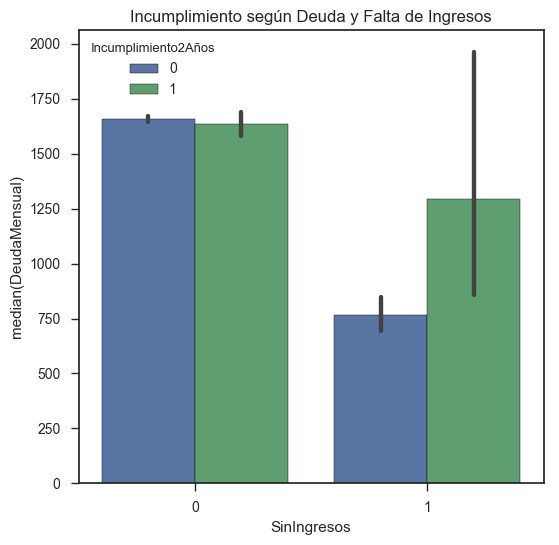

In [35]:
Grafico_Barra('SinIngresos','DeudaMensual','Incumplimiento según Deuda y Falta de Ingresos')

Aunque la diferencia de delincuencia para los que si tienen ingresos mensuales es negligible, existe una enorme diferencia en delincuencia para los que no tienen ingresos. Se puede apreciar que los que tienen una gran deuda que pagar mensualmente y no disponen de ingresos mensuales para pagarla, son más propensos a estar más de 90 días tardes en pagar. Por ultimo, veamos una matriz de correlación sobre las variables numericas que utilizamos anteriormente. Antes de crear esta matriz, hay que normalizar los valores de los datos. Esto es para llevar todos los valores a la misma magnitud. De esta forma, Los valores altos de ingresos mensuales, que van hasta los millones, y los valores altos de proporción de deuda serán considerados de igual manera: valores altos. Ya que tenemos muchas características que representan proporciones, normalizaremos los valores a numeros entre 0 y 1.

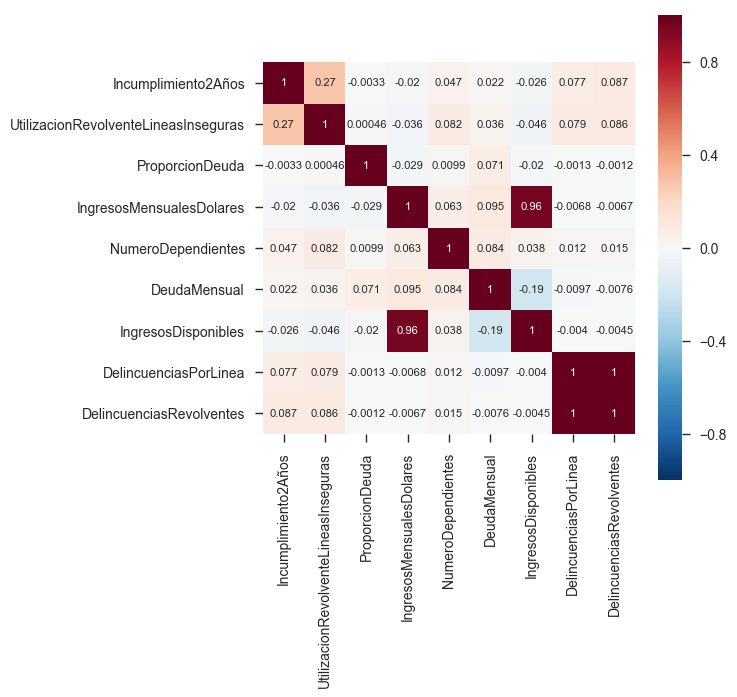

In [36]:
def Normalizacion(datos):
    return ( datos - datos.min())/(datos.max() - datos.min())

num_df_norm = Normalizacion(num_df)
datos_normalizados = Normalizacion(datos_limpios)
corr = num_df_norm.corr()
rcParams["font.size"] = 8
plt.matshow(corr)
ax = sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot = True)


La unica correlación decentemente fuerte para nuestra variable de interes es la utilización revolvente de lineas inseguras, donde mientras más alto es este factor, más probabilidades hay de que el cliente se convierta en delincuente. Ya con esto, pasemos al modelado.

## 5. Modelado

Para el modelado utilizaremos dos modelos de comparación: Un modelo de regresión logistica y un modelo de arbol xgboost. Los dos modelos serán evaluados según su rendimiento con la area debajo de la curva de rendimiento del diagnostico. Para calcularla, se calculan las probabilidades de que un cliente sea delicuente. Luego, se fija un valor como limite, las probabilidades debajo de ese limite se considerarian no delincuentes (0) y las que esten sobre el limite se considerarian delincuentes (1). Luego de esto, se obtienen los falsos positivos y negativos, valores que fueron clasificados mal segun el limite inpuesto anteriormente. Continuando, se cambia el valor del limite y se repiten los mismos pasos. Al final, cuando terminemos con todos los limites, quedará una curva con todos los puntos de la proporción de falsos positivos y falsos negativos. La forma de esta curva, determinará que tan bueno es el modelo.

![title](http://www.hrc.es/bioest/roc_21.gif)

Utilizamos esta medida porque es efectiva al momento de evlauar los falsos positivos y falsos negativos. Para el problema de aprobación de crédito, el caso de no otorgarle crédito a alguien que se lo merecia es mucho mejor que otorgarle crédito a alguien que será un mal cliente. Por esto, utilizar una medida sensible a los falsos positivos es eficiente para este problema especifico. Para esta medida, mientras su valor este más cercano a 1, mejor.

#### 5.1 Regresión Logistica

La regresión logistica es un modelo simple e interpretable. Este modelo asume que podemos separar los buenos clientes de los malos con una linea. Si nos imaginamos que todos los clientes pertenecen a un plano según sus caracteristicas, se podrían dividir los clientes buenos de los malos con una linea. El objetivo de la regresión logistica es encontrar la linea que mejor pueda separar los buenos clientes de los malos. Lo mejor de la regresión logistica, es que nos permite interpretar como las características afectan la calidad del cliente, y que hace que un cliente sea delincuente. Sin embargo, como está limitado a separar las clases como una linea, puede fallar cuando las clases no son faciles de separar con una linea. Primero, vamos a separar los datos en datos de prueba y datos de entrenamiento. Vamos a utilizar los datos de prueba para validar el modelo contra datos que no ha visto.

In [37]:
Xtrain,Xtest,ytrain,ytest = train_test_split(datos_normalizados.drop("Incumplimiento2Años",axis = 1),
                                                               datos_normalizados["Incumplimiento2Años"],
                                                               test_size =  0.2,random_state = 777)

In [38]:
modelo_logreg = LogisticRegressionCV(cv = 5,scoring = 'roc_auc')
modelo_logreg.fit(Xtrain,ytrain)
print("El rendimiento del modelo fue {}".format(round(modelo_logreg.score(Xtest,ytest),2)))

El rendimiento del modelo fue 0.93


El modelo tuvo un rendimiento excelente. Vamos a visualizar los falsos positivos y negativos que obtuvo el modelo.

In [39]:
prediccion_logreg = modelo_logreg.predict(Xtest)
cf_mat = confusion_matrix(ytest, prediccion_logreg)
print("Clientes correctamente clasificados: {}".format(cf_mat[0][0] + cf_mat[1][1]))
print("Clientes buenos clasificados como malos: {}".format(cf_mat[1][0]))
print("Clientes malos clasificados como buenos: {}".format(cf_mat[0][1]))

Clientes correctamente clasificados: 22377
Clientes buenos clasificados como malos: 1550
Clientes malos clasificados como buenos: 91


Para nuestra medida de exito del problema, el modelo de regresión logistica tuvo un muy rendimiento admirable. Minimizamos el número de clientes malos clasificados como buenos. Vamos a visualizar el rendimiento del modelo con otros factores:

- Certeza: Proporción de clientes correctamente clasificados.
- Precisión: Proporción de clientes clasificados como buenos, incluyendo los clientes malos clasificados como buenos.
- Cobertura: Proporción de clientes clasificados como buenos, incluyendo los clientes buenos clasificados como malos.





In [40]:
def Medidas_Rendimiento(matriz_confusion):
    size = matriz_confusion.sum()
    Certeza = (matriz_confusion[0][0] + matriz_confusion[1][1]) / size
    Precision = (matriz_confusion[0][0] /(matriz_confusion[0][0] + matriz_confusion[0][1]))
    Cobertura = (matriz_confusion[0][0] / (matriz_confusion[0][0] + matriz_confusion[1][0]))
    print("La certeza del modelo fue de {} %".format(round(Certeza * 100,2)))
    print("La precisión del modelo fue de {} %".format(round(Precision * 100,2)))
    print("La cobertura del modelo fue de {} %".format(round(Cobertura * 100,2)))

Medidas_Rendimiento(cf_mat)

La certeza del modelo fue de 93.17 %
La precisión del modelo fue de 99.59 %
La cobertura del modelo fue de 93.49 %


La precisión del modelo es casi perfecta. Esto minimizará los falsos positivos en aplicaciones de crédito. Vamos a ver como cada característica afecta al modelo en general.

In [41]:
coeficientes_logreg = modelo_logreg.coef_
coeficientes_df = pd.DataFrame({"Caracteristica":Xtrain.columns,"Peso":coeficientes_logreg[0]})
coeficientes_df.sort_values(by = "Peso")

,Caracteristica,Peso
4,IngresosMensualesDolares,-42.258186
20,IngresosDisponibles,-35.730627
8,VecesVencimiento60_89Dias,-6.770234
2,VecesVencimiento30_59Dias,-3.866579
10,DeudaMensual,-1.983243
16,LineasRevolventes,-1.668320
11,NuncaTarde,-1.584079
1,Edad,-1.298856
13,SinIngresos,-0.807252
17,TieneRevolventes,-0.430256


Primero, vamos a analizar que características de un cliente lo hacen más probable de cumplir con los pagos del crédito. El factor más importante para determinar buenos clientes es sus ingresos. Estos clientes con ingresos muy altos son más propensos a pagar las cuotas, ya que tienen los medios para hacerlo, y por ende son los más probables a estar limpios de delincuencia a más de 90 dias por los proximos dos años.Otros factores importantes incluyen: 

- Las veces que ha estado tarde de 30 a 89 días. Por más extraño que parezca, este factor ha es fuerte al determinar si un cliente no será delincuente. Quizas esto se debe a que estas personas están acostumbradas a pagar en este rango de días y no más, por lo que no se convierten en delincuentes después de 90 días, el cual es el objetivo del modelo.

- Deuda Mensual. Otro factor extraño, pero según el modelo, los clientes con una deuda mensual alta, son menos propensos a ser delincuentes. Pero, como este dato fue calculado con los valores de los ingresos mensuales y la proporción de deuda, se puede asumir que esta relacionado a los altos valores de los ingresos mensuales. Si alguien tiene una deuda alta, pero tiene altos ingresos,  es muy probable que comoquiera llegue a pagarlos.

- Lineas Revolventes. Aquellos clientes que tienen  lineas o tarjetas de crédito son más propensos a no ser delincuentes. Las tarjetas de crédito usualmente llevan buenos registros de las transacciones, por lo que los clientes están más atentos a su pago.

- Nunca Tarde. Los clientes que nunca han estado tarde con un pago de crédito, por lógica, son buenos clientes.

Ya en el aspecto contrario, lo más importante para determinar un mal cliente es su numero de delincuencias en las mismas lineas de crédito. Aquellos clientes que han sido delincuentes en el pasado, especialmente en lineas revolventes, son más propensos a ser delincuentes nuevamente.  Otros factores importantes incluyen: 

- Proporción de utilización revolvente en líneas inseguras. Esto es el total de crédito en lineas o tarjetas dividido entre la  suma de los limites de crédito. Si el número es muy alto, o como vimos anteriormente, mayor que 1, significa que el cliente ha superado  su limite de crédito en situaciones anteriores. Como vemos, el modelo nos dice que estos clientes están más propensos a sufrir atrasos e incurrir delincuencia, ya que no han planificado bien el uso de su crédito, y terminar superando el limite establecido.

- Vencimiento  de 90 días en adelante. Este es el número de delincuencias graves en el pasado. Si lo hizo una vez, probablemente lo hará de nuevo.

Estos factores pueden ser diferentes si eliminamos los valores extremos del set de datos. Para esta ocasión, no fueron eliminados, y el modelo no sufrió mucho por esto.

Vamos a ver ahora el rendimiento de xgboost.

#### 5.2 XGBoost

XGBoost es un modelo basado en los arboles de decisión. Los arboles de decisión son modelos que hacen predicciones basadas en condiciones. Un ejemplo de estas es predecir que para todo cliente cuya utilización revolvente de lineas inseguras superé 1, el cliente será un delincuente. Los arboles también pueden utilizar multiples factores para llegar a una decision, como decir que clientes que nunca se han retrasado, y que tienen altos ingresos siempre son buenos. XGBoost utiliza multiples arboles optimizados y con caracteristicas aleatorias, y utiliza un promedio entre todos los arboles para la decisión final. Esto hace que el modelo sea bien robusto contra datos raros o extremos.

In [51]:
xgbparams = {
        "max_depth":3,
        "eta":0.025,
        "objective": "binary:logistic",
        "booster" : "gbtree",
        "eval_metric": "auc",
        "seed": 777
    }

dtrain = xgb.DMatrix(Xtrain,ytrain)
cv = xgb.cv(xgbparams,dtrain,num_boost_round = 1000,nfold = 5,early_stopping_rounds = 50,verbose_eval = 50,seed = 777)

[0]	train-auc:0.817673+0.00348137	test-auc:0.815144+0.00606931
[50]	train-auc:0.839671+0.00172175	test-auc:0.836986+0.00758774
[100]	train-auc:0.847211+0.00149818	test-auc:0.844283+0.00642411
[150]	train-auc:0.852232+0.00128146	test-auc:0.84831+0.00621689
[200]	train-auc:0.856727+0.00118825	test-auc:0.851784+0.00545928
[250]	train-auc:0.859424+0.00113041	test-auc:0.853273+0.00504402
[300]	train-auc:0.861352+0.00109276	test-auc:0.854144+0.00477937
[350]	train-auc:0.862858+0.0011824	test-auc:0.85471+0.00459236
[400]	train-auc:0.863994+0.00115441	test-auc:0.854928+0.00451142
[450]	train-auc:0.864903+0.00118782	test-auc:0.85513+0.00450902
[500]	train-auc:0.865759+0.00124104	test-auc:0.855249+0.00450321
[550]	train-auc:0.866493+0.0012573	test-auc:0.855292+0.0044936
[600]	train-auc:0.867152+0.00126949	test-auc:0.85535+0.00452158
[650]	train-auc:0.86777+0.00128473	test-auc:0.855426+0.00452155
[700]	train-auc:0.868418+0.00130236	test-auc:0.855514+0.00453983
[750]	train-auc:0.868974+0.00135559	

Al parecer, el AUC de XGBoost fue menor que el de regresión logistica. Vamos a probar el rendimiento del modelo con otros factores. XGBoost arroja probabilidades de que el cliente sea malo. Por esta razon, primero debemos convertir esas probabilidades a valores binarios concretos de sí (1) o no (0).

In [52]:
model = xgb.train(xgbparams,dtrain,num_boost_round = len(cv))
dtest = xgb.DMatrix(Xtest)
prediccion_xgb = model.predict(dtest)

Para encontrar el mejor limite para clasificar los clientes como buenos y malos, probamos todos los valores entre 1 y 99, y 
calculamos la precisión y cobertura para este limite. El limite con la cobertura y precisión más alta será seleccionado como el mejor limite.

In [53]:
def Mejor_Limite(predicciones,reales):
    mejor_limite = 0
    mejor_precision = 0
    mejor_cobertura = 0
    for i in range(1,100):
        conf = confusion_matrix(reales, predicciones > (i / 100))
        Precision = (conf[0][0] /(conf[0][0] + conf[0][1]))
        Cobertura = (conf[0][0] / (conf[0][0] + conf[1][0]))
        if Precision > mejor_precision or Cobertura > mejor_cobertura:
            mejor_precision =  Precision
            mejor_cobertura = Cobertura
            mejor_limite = i
    
    print("Mejor limite: {}".format(mejor_limite / 100))
    print("Mejor precisión: {} %".format(round(mejor_precision * 100,2)))
    print("Mejor cobertura: {} %".format(round(mejor_cobertura * 100,2)))
    return mejor_limite / 100

limite = Mejor_Limite(prediccion_xgb,ytest)

Mejor limite: 0.87
Mejor precisión: 100.0 %
Mejor cobertura: 93.11 %


Se puede observar que para si establecemos un limite muy alto para el limite, podemos obtener una precisión de 100%, seleccionando solo clientes buenos. Sin embargo, tenemos una cobertura un poco más baja, alienando a posibles clientes buenos. Si establecemos valores para el limite más pequeños, como en el rango de 60-70%, obtenemos valores más balanceados. Vamos a ver cuantos fueron correctamente clasificados por el modelo.

In [54]:
cf_mat = confusion_matrix(ytest, prediccion_xgb > limite)
print("Clientes correctamente clasificados: {}".format(cf_mat[0][0] + cf_mat[1][1]))
print("Clientes buenos clasificados como malos: {}".format(cf_mat[1][0]))
print("Clientes malos clasificados como buenos: {}".format(cf_mat[0][1]))

Clientes correctamente clasificados: 22363
Clientes buenos clasificados como malos: 1655
Clientes malos clasificados como buenos: 0


Aunque el modelo tuvo una precisión perfecta, sufrió un poco en su certeza, y bastante en su  cobertura. En contraste, si utilizamos un menor valor para el límite:

In [55]:
cf_mat = confusion_matrix(ytest, prediccion_xgb > 0.69)
print("Clientes correctamente clasificados: {}".format(cf_mat[0][0] + cf_mat[1][1]))
print("Clientes buenos clasificados como malos: {}".format(cf_mat[1][0]))
print("Clientes malos clasificados como buenos: {}".format(cf_mat[0][1]))

Clientes correctamente clasificados: 22406
Clientes buenos clasificados como malos: 1576
Clientes malos clasificados como buenos: 36


Obtenemos una mejor  certeza y precisión que en regresión logistica, afectando solo un poco menos a la cobertura. Ahora visualisemos dos ventajas importantes del modelo de arbol, la importancia de factores y el arbol en sí. La importancia de factores nos dice cuales son las características que más separan a los clientes buenos de los malos. Se puede decir que son características volatiles, cuyo cambio en su valor causa una separación en la calidad de un cliente. La importancia se mide con los pesos de las variables. Mientras más aparecen en los distintos arboles creados por el modelo, más importante son. Para simplificar, solo veremos las 5 características más importantes.

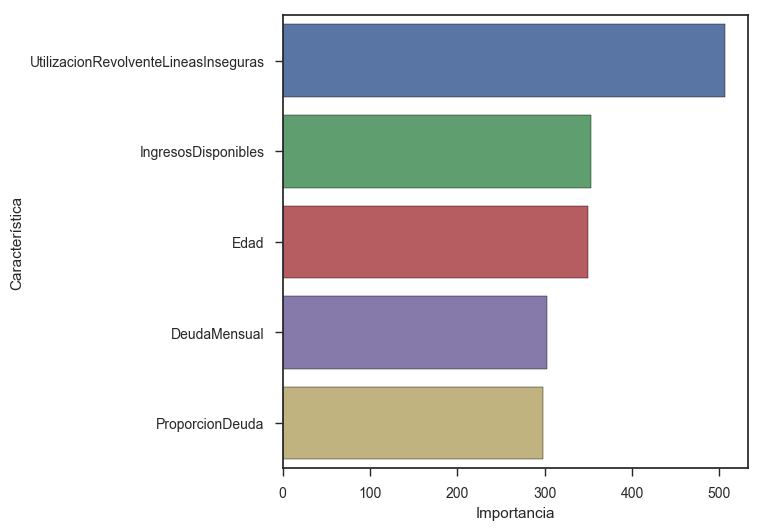

In [49]:
f_score = model.get_fscore()
importance_df = pd.DataFrame({'Característica':list(f_score.keys()),'Importancia':list(f_score.values())})
importance_df.sort_values(by = 'Importancia',ascending = False,inplace = True)
sns.barplot(x = 'Importancia', y = 'Característica',data = importance_df.head())
plt.xlabel('Importancia')

Aquí se ve un poco de contraste en comparación con el modelo de regresión logistica. El factor más importante es la utilización de crédito revolvente en lineas inseguras. Según regresión logística, esta es una característica importante para determinar si un cliente será **delincuente**. Tres factores relacionados son la proporción de la deuda, los ingresos disponibles y la deuda mensual. Según hemos visto en el análisis hasta ahora,  hay clientes con una proporción de deuda y valores de la deuda muy grandes, pero que no terminan siendo delincuentes.  Por ahí mismo, aquellos con muchos ingresos son menos propensos a ser delincuentes, a diferencia de los que tienen ingresos muy bajos. Un factor importante pero no visto anterior mente es la edad. Esto parece extraño ya que la edad por sí sola separa los futuros delincuentes. Pero en combinación con otras características, como vimos en la gráfica de la relación entre lineas revolventes y edad, se puede visualizar con más claridad como la edad influye en para poder clasificar malos clientes. Ahora, veamos el arbol  de decisión final con el que quedamos.

In [58]:
fig= plt.figure( figsize=(24, 24), dpi=500)
axes = plt.Axes(fig,[0., 0., 1., 1.])
axes.set_axis_off()
fig.add_axes(axes)
xgb.plot_tree(model,num_trees = len(cv) - 1,ax = axes)


Según este arbol, podemos ver 2 decisiones que llegan a determinar si un cliente es delincuente:

1. Clientes con pocos ingresos y una alta proporción de deuda.
2. Clientes con altos ingresos, alta deuda y una gran cantidad de bienes raices.

Como los valores están normalizados para el modelo, los números de las decisiones no son exactos. Sin embargo, las decisiones del arbol son parecidas a lo que hemos visto hasta ahora.

## 6. Conclusión

Pudimos crear un modelo que puede predecir con cierta exactitud, la probabilidad de que un cliente se convierta en un delincuente, evitando el pago del crédito por más de 90 días, durante los proximos dos años. Este modelo puede ser extrapolado para especificar delincuentes despues de 30 o 60 días, con casi el mismo análisis, pero con una mayor proporción de  atrasos. Pudimos verificar las características que hacen que un cliente pueda ser delincuente en futuro, como son sus ingresos mensuales, la cantidad de atrasos que ha tenido en el pasado y  el monto de la deuda en sí que le pertenece. También se pueden apreciar detalles más pequeños, como los clientes con lineas revolventes son menos propensos a ser delincuentes, y como la cantidad de lineas de bienes raíces afecta la calidad del cliente. En sí, pudimos optimizar un objetivo muy importante, evitar otorgar crédito a potenciales malos clientes, mientras se minimiza la cantidad de buenos clientes afectados.